# Imports and reading data

In [1]:
import pandas as pd
import os

DATA_FOLDER = "data"
CRM_PATH = os.path.join(DATA_FOLDER, "crm_data.csv")
WEB_TRACKING_PATH = os.path.join(DATA_FOLDER, "web_tracking.csv")

In [2]:
crm_df = pd.read_csv(CRM_PATH)
web_tracking_df = pd.read_csv(WEB_TRACKING_PATH)

# EDA + Data validation

In [4]:
crm_df#.columns

,user_id,lead_status,company,sign_up_date,industry,country
0,137,Converted,Company_0,2024-03-09,Healthcare,US
1,163,Converted,Company_1,2024-03-01,Finance,UK
2,103,Prospect,Company_2,2024-03-02,Healthcare,France
3,163,Lost,Company_3,2024-03-01,SaaS,US
4,171,Lost,Company_4,2024-03-07,Healthcare,Germany
5,151,Converted,Company_5,2024-03-01,Finance,US
6,141,Prospect,Company_6,2024-03-02,E-commerce,Germany
7,117,Lost,Company_7,2024-03-08,Finance,France
8,114,Lost,Company_8,2024-03-09,Finance,UK
9,171,Prospect,Company_9,2024-03-10,Finance,US


In [5]:
crm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       60 non-null     int64 
 1   lead_status   60 non-null     object
 2   company       60 non-null     object
 3   sign_up_date  60 non-null     object
 4   industry      60 non-null     object
 5   country       60 non-null     object
dtypes: int64(1), object(5)
memory usage: 2.9+ KB


In [19]:
crm_df.isna().sum()

user_id         0
lead_status     0
company         0
sign_up_date    0
industry        0
country         0
dtype: int64

In [12]:
crm_df.nunique()

user_id         47
lead_status      3
company         60
sign_up_date    11
industry         4
country          4
dtype: int64

In [6]:
crm_df["sign_up_date"] = pd.to_datetime(crm_df["sign_up_date"] )

In [7]:
crm_df["sign_up_date"].describe()

count                     60
mean     2024-03-05 16:24:00
min      2024-03-01 00:00:00
25%      2024-03-02 00:00:00
50%      2024-03-06 00:00:00
75%      2024-03-09 00:00:00
max      2024-03-11 00:00:00
Name: sign_up_date, dtype: object

In [17]:
crm_df[crm_df.user_id.duplicated()] 

,user_id,lead_status,company,sign_up_date,industry,country
3,163,Lost,Company_3,2024-03-01,SaaS,US
9,171,Prospect,Company_9,2024-03-10,Finance,US
20,161,Converted,Company_20,2024-03-11,Finance,US
31,187,Converted,Company_31,2024-03-04,E-commerce,US
33,150,Prospect,Company_33,2024-03-10,SaaS,UK
35,120,Prospect,Company_35,2024-03-06,SaaS,Germany
36,103,Prospect,Company_36,2024-03-07,SaaS,UK
39,161,Converted,Company_39,2024-03-01,Finance,US
40,146,Lost,Company_40,2024-03-03,Finance,US
52,102,Converted,Company_52,2024-03-02,SaaS,US


In [37]:
def plot_column_distribution(df, col_name):
    result = df[col_name].value_counts()
    print(result)
    return result.plot(kind = "bar")

lead_status
Converted    25
Lost         18
Prospect     17
Name: count, dtype: int64


<Axes: xlabel='lead_status'>

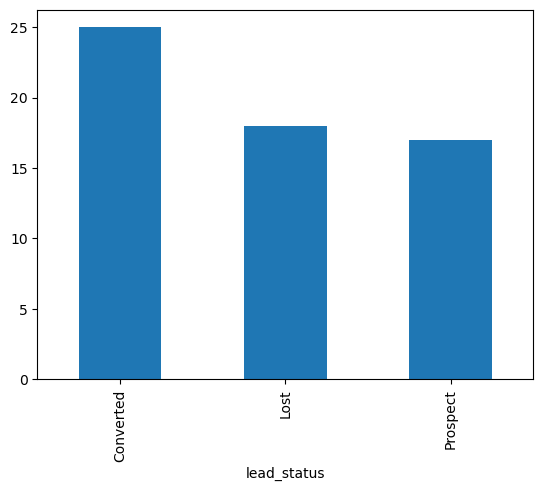

In [38]:
plot_column_distribution(crm_df, "lead_status")

In [39]:
(crm_df["lead_status"] == "Converted").sum() / len(crm_df)

0.4166666666666667

industry
Finance       22
SaaS          15
E-commerce    14
Healthcare     9
Name: count, dtype: int64


<Axes: xlabel='industry'>

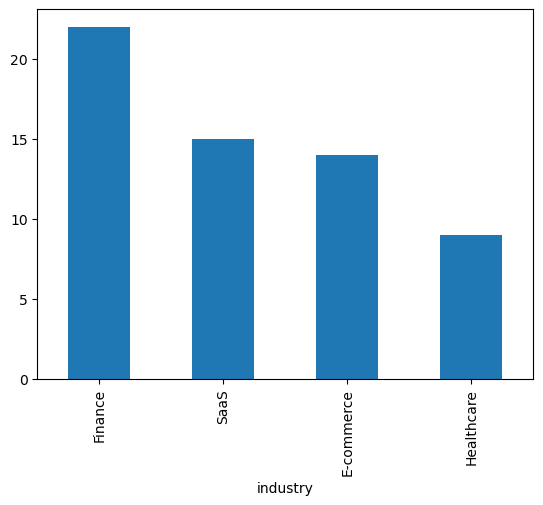

In [41]:
plot_column_distribution(crm_df, "industry")

country
US         27
UK         14
Germany    12
France      7
Name: count, dtype: int64


<Axes: xlabel='country'>

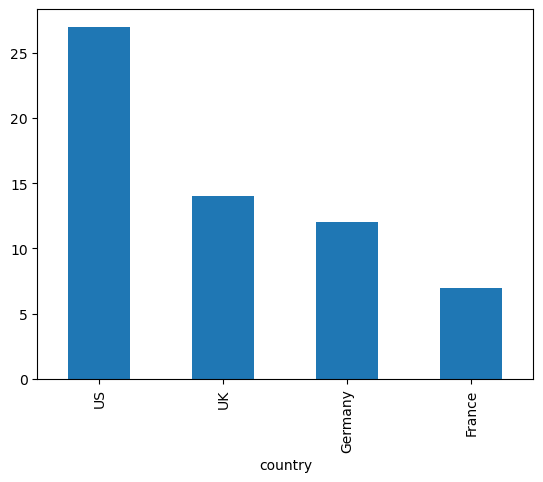

In [42]:
plot_column_distribution(crm_df, "country")

- There are three options for lead_status: ("converted", "lost", "prospect")
- lead_status = "converted" is the most likely to appear with 25 incides (42%)
- The largest groups of web activity:
    - Industry: Finance (22)
    - Country: US (27)
- The smallest groups of web activity:
    - Industry: Healthcare (9)
    - Country: France (7) 

In [55]:
def get_conversion_rate(values, prospects = True):
    # print(values)
    num_converted = values[values == "Converted"].shape[0]
    if prospects:
        total = values.shape[0]
    else:
        total = values[values != "Prospect"].shape[0]
    percentage = num_converted / total * 100
    return percentage
    # converted = values[values["lead_status"] == "Converted"].shape[0]

In [62]:
def plot_conversion_rate_by_column(col_name, prospects = True):
    conv_rate = crm_df.groupby(col_name)["lead_status"].apply(lambda x: get_conversion_rate(x, prospects))
    sorted_conv_rates = conv_rate.sort_values(ascending = False)
    print(sorted_conv_rates)
    return sorted_conv_rates.plot(kind = "bar")

country
US         59.259259
UK         42.857143
Germany    16.666667
France     14.285714
Name: lead_status, dtype: float64


<Axes: xlabel='country'>

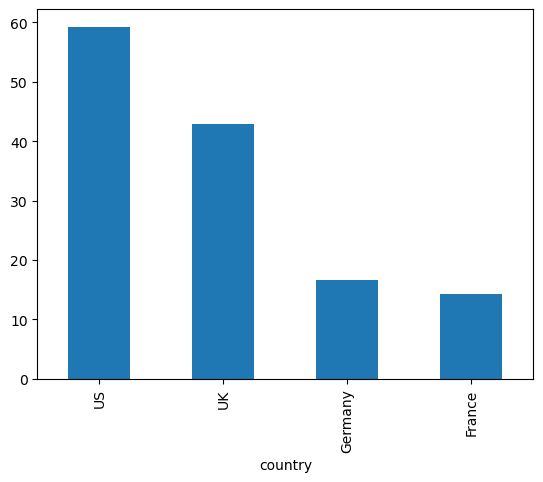

In [61]:
plot_conversion_rate_by_column("country")

industry
Healthcare    55.555556
Finance       40.909091
SaaS          40.000000
E-commerce    35.714286
Name: lead_status, dtype: float64


<Axes: xlabel='industry'>

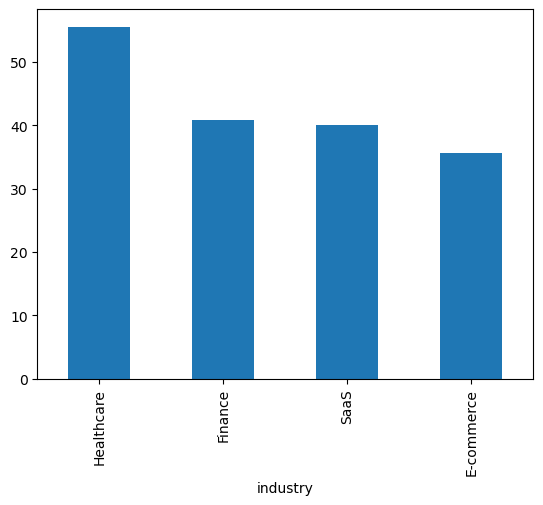

In [58]:
plot_conversion_rate_by_column("industry")

- The US has highest conversion rate (59%) in contrast to France with the lowest (14%)
- Healthcare has highest conversion rate (55%) in contrast to E-commerce (36%)
- **NOTE:** This conversion rate calculation also includes lead_status = "prospects"

industry
Healthcare    71.428571
SaaS          66.666667
Finance       52.941176
E-commerce    50.000000
Name: lead_status, dtype: float64


<Axes: xlabel='industry'>

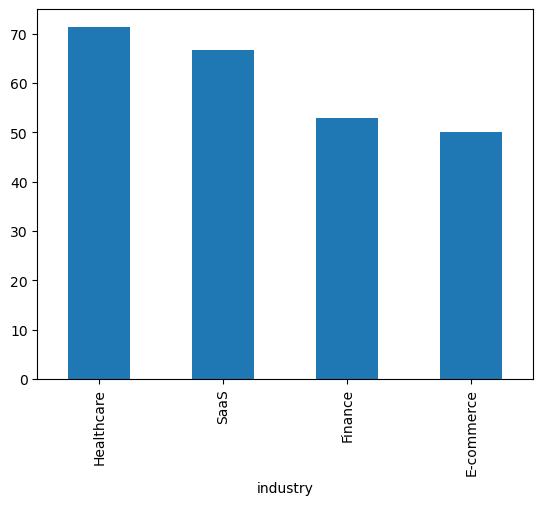

In [63]:
plot_conversion_rate_by_column("industry", prospects = False)

country
US         69.565217
UK         66.666667
France     33.333333
Germany    25.000000
Name: lead_status, dtype: float64


<Axes: xlabel='country'>

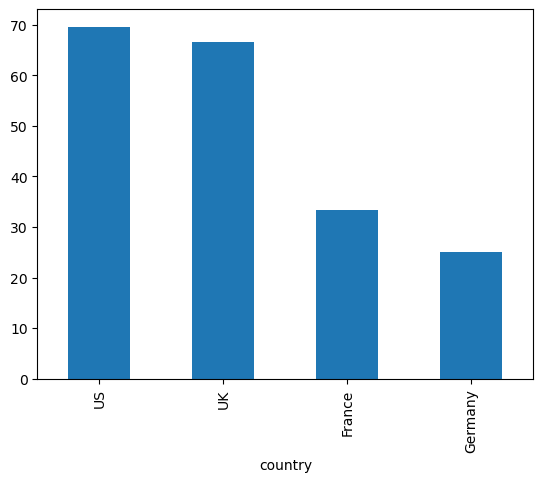

In [64]:
plot_conversion_rate_by_column("country", prospects = False)

- findings change drastically by not including lead_status = "Prospect"
    - Industry: Conversion rate differences are less between industries (ranges from 51% (E-commerce) to 71% (Healthcare)
    - Country: The lowest country now is Germany with 25% and US with increased conversionrate of 69%

In [9]:
web_tracking_df.columns

Index(['user_id', 'session_id', 'timestamp', 'page', 'time_spent_sec',
       'utm_source', 'utm_medium', 'device_type'],
      dtype='object')

In [96]:
web_tracking_df.groupby('user_id').page.apply(list)

user_id
101    [/contact, /features, /landing, /landing]
102                         [/landing, /contact]
103              [/features, /contact, /contact]
105                                  [/features]
106                                  [/features]
                         ...                    
190                                  [/features]
191                         [/contact, /pricing]
192                         [/landing, /landing]
194                                  [/features]
199                        [/landing, /features]
Name: page, Length: 61, dtype: object

In [97]:
def create_2_dim_table(col_name: str) -> None:
    

SyntaxError: incomplete input (766641423.py, line 2)

In [98]:
create

NameError: name 'create' is not defined

In [80]:
company_dim = crm_df[['company']].drop_duplicates().reset_index(drop=True)
company_dim['company_id'] = company_dim.index + 1

In [74]:
industry_dim = crm_df[['industry']].drop_duplicates().reset_index(drop=True)
industry_dim['industry_id'] = industry_dim.index + 1

In [75]:
country_dim = crm_df[['country']].drop_duplicates().reset_index(drop=True)
country_dim['country_id'] = country_dim.index + 1

In [93]:
# Sign-up time breakdown
crm_df['sign_up_datetime'] = pd.to_datetime(crm_df['sign_up_date'])
sign_up_time_dim = crm_df[['sign_up_datetime']].drop_duplicates().reset_index(drop=True)
sign_up_time_dim['sign_up_time_id'] = sign_up_time_dim.index + 1
sign_up_time_dim['sign_up_year'] = sign_up_time_dim['sign_up_datetime'].dt.year
sign_up_time_dim['sign_up_month'] = sign_up_time_dim['sign_up_datetime'].dt.month
sign_up_time_dim['sign_up_week'] = sign_up_time_dim['sign_up_datetime'].dt.isocalendar().week
sign_up_time_dim['sign_up_weekday'] = sign_up_time_dim['sign_up_datetime'].dt.weekday

In [92]:
# User Dimension Table
user_dim = crm_df.merge(company_dim, on="company")\
.merge(industry_dim, on="industry")\
.merge(country_dim, on="country")\
.merge(sign_up_time_dim, on="sign_up_datetime")\
.merge(lead_status_dim, on="lead_status")\
[["user_id","lead_status_id", "industry_id", "company_id", "country_id", "sign_up_time_id"]].drop_duplicates(subset='user_id')

In [85]:
# Prepare Session Data Dimensions
web_tracking_df["timestamp_datetime"] = pd.to_datetime(web_tracking_df['timestamp'])
datetime_dim = web_tracking_df[['timestamp_datetime']].drop_duplicates().reset_index(drop=True)
datetime_dim['datetime_id'] = datetime_dim.index + 1
datetime_dim['year'] = datetime_dim['timestamp_datetime'].dt.year
datetime_dim['month'] = datetime_dim['timestamp_datetime'].dt.month
datetime_dim['week'] = datetime_dim['timestamp_datetime'].dt.isocalendar().week
datetime_dim['weekday'] = datetime_dim['timestamp_datetime'].dt.weekday

In [86]:
page_dim = web_tracking_df[['page']].drop_duplicates().reset_index(drop=True)
page_dim['page_id'] = page_dim.index + 1

In [87]:
utm_source_dim = web_tracking_df[['utm_source']].drop_duplicates().reset_index(drop=True)
utm_source_dim['utm_source_id'] = utm_source_dim.index + 1

In [88]:
utm_medium_dim = web_tracking_df[['utm_medium']].drop_duplicates().reset_index(drop=True)
utm_medium_dim['utm_medium_id'] = utm_medium_dim.index + 1

In [89]:
device_type_dim = web_tracking_df[['device_type']].drop_duplicates().reset_index(drop=True)
device_type_dim['device_type_id'] = device_type_dim.index + 1

In [91]:
# Fact Table
fact_table = web_tracking_df.merge(user_dim, on="user_id")\
.merge(datetime_dim, on="timestamp_datetime")\
.merge(page_dim, on="page")\
.merge(utm_source_dim, on="utm_source")\
.merge(utm_medium_dim, on="utm_medium")\
.merge(device_type_dim, on="device_type")\
[['session_id', 'user_id', 'datetime_id', 'page_id', 'utm_source_id', 'utm_medium_id', 'device_type_id', 'time_spent_sec']]